In [245]:
import numpy as np
import pandas as pd
import missingno as ms
from src.loan_pred.visualization.visualize import Plots
import seaborn as sns
import matplotlib.pyplot as plt

## Explorations datasets

### I- Data: traindemographics dataset

In [12]:
train_dg = pd.read_csv("../data/raw_data/train/traindemographics.csv")
train_dg.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


In [13]:
train_dg.shape

(4346, 9)

## Missing values

In [14]:
# Purcentage of data that is missing
train_dg.isnull().sum()/train_dg.shape[0] * 100

customerid                     0.000000
birthdate                      0.000000
bank_account_type              0.000000
longitude_gps                  0.000000
latitude_gps                   0.000000
bank_name_clients              0.000000
bank_branch_clients           98.826507
employment_status_clients     14.910262
level_of_education_clients    86.493327
dtype: float64

We notice that the column bank_branch_clients and level_of_education_clients and mainly missing more than 85%. We will remove those two columns. We will impute the missing values of the column employment_status_clients

In [15]:
train_dg.drop(["bank_branch_clients", "level_of_education_clients"], axis=1, inplace=True)

<AxesSubplot:>

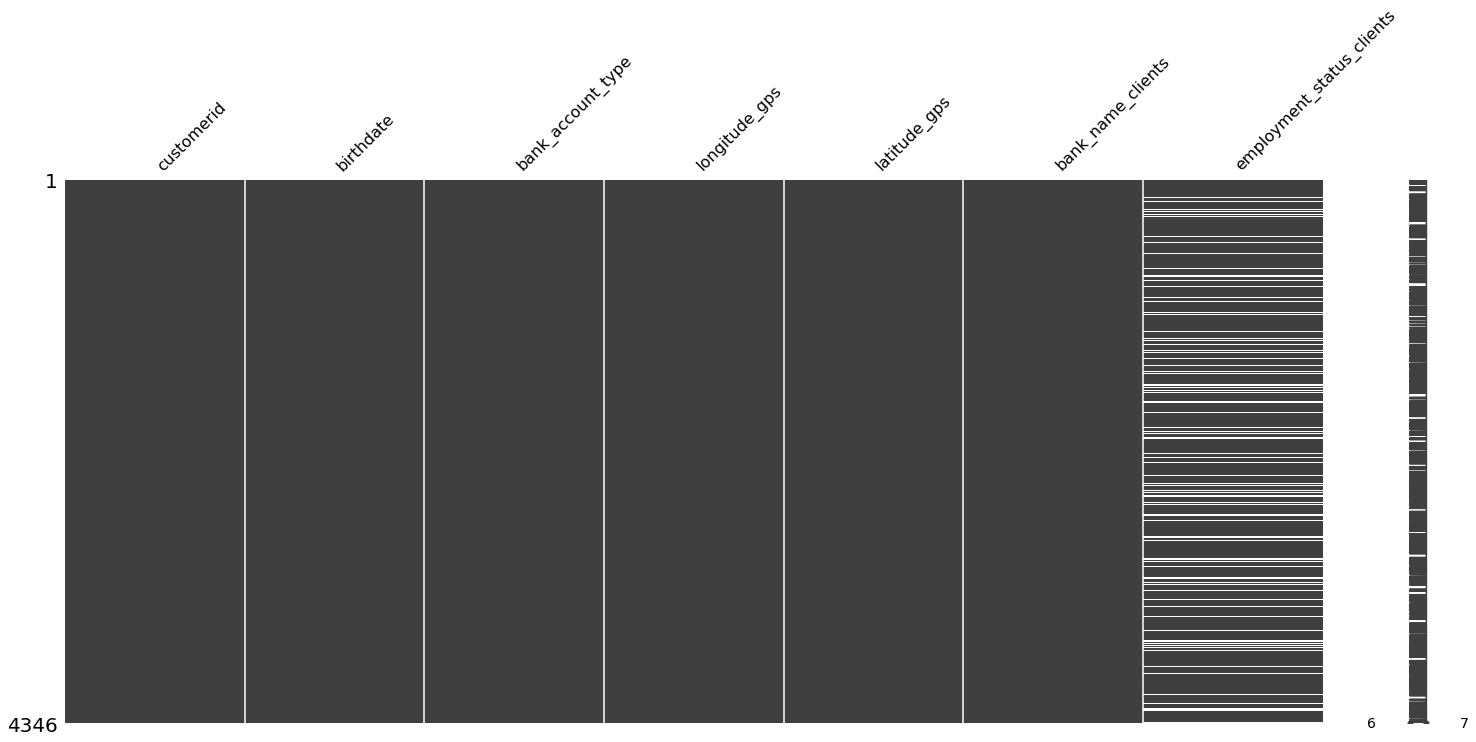

In [16]:
ms.matrix(train_dg)

In [17]:
train_dg.employment_status_clients.unique()

array([nan, 'Permanent', 'Student', 'Self-Employed', 'Unemployed',
       'Retired', 'Contract'], dtype=object)

Verdict:
- Créer une nouvelle colonne qui mentionne 1 si la valeur de employment_status_clients est manquante sinon 0
- Imputer les valeur manquantes de employment_status_clients par le mode de la colonne en question (première phase). sinon une imputation intelligente

## Duplicate and low variation data

In [26]:
train_dg.shape

(4346, 8)

In [31]:
train_dg.drop_duplicates().reset_index(drop=True, inplace=True)

In [32]:
train_dg.shape

(4334, 8)

we actually had 12 duplicates rows.
Let's check the variation of the columns (categorical columns)

In [33]:
train_dg.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,employment_status_clients_is_missing
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,0
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,Permanent,0
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,0
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,Permanent,0
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,Permanent,0


In [36]:
# Let's set the type of the columns
train_dg.dtypes

customerid                              category
birthdate                                 object
bank_account_type                         object
longitude_gps                            float64
latitude_gps                             float64
bank_name_clients                         object
employment_status_clients                 object
employment_status_clients_is_missing       int64
dtype: object

In [43]:
def convert_dtype(data: pd.DataFrame, columns_type: dict) -> pd.DataFrame:
    """
    Function to convert pandas dataframe columns to a specific type except the datetime.

    :param data: pandas dataframe
    :param columns_type: dict, dictionary where the k in the column name and the value is the type
    :return: pandas dataframe, tranformed data
    """
    for c, t in columns_type.items():
        data[c] = data[c].astype(t)
    return data

In [47]:
types = {
    "customerid": "category",
    "bank_account_type": "category",
    "bank_name_clients": "category",
    "employment_status_clients": "category",
    "longitude_gps": "float",
    "latitude_gps": "float"
}
train_dg = convert_dtype(data=train_dg, columns_type=types)

In [48]:
train_dg.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,employment_status_clients_is_missing
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,0
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,Permanent,0
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,0
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,Permanent,0
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,Permanent,0


In [50]:
train_dg.dtypes

customerid                              category
birthdate                                 object
bank_account_type                       category
longitude_gps                            float64
latitude_gps                             float64
bank_name_clients                       category
employment_status_clients               category
employment_status_clients_is_missing       int64
dtype: object

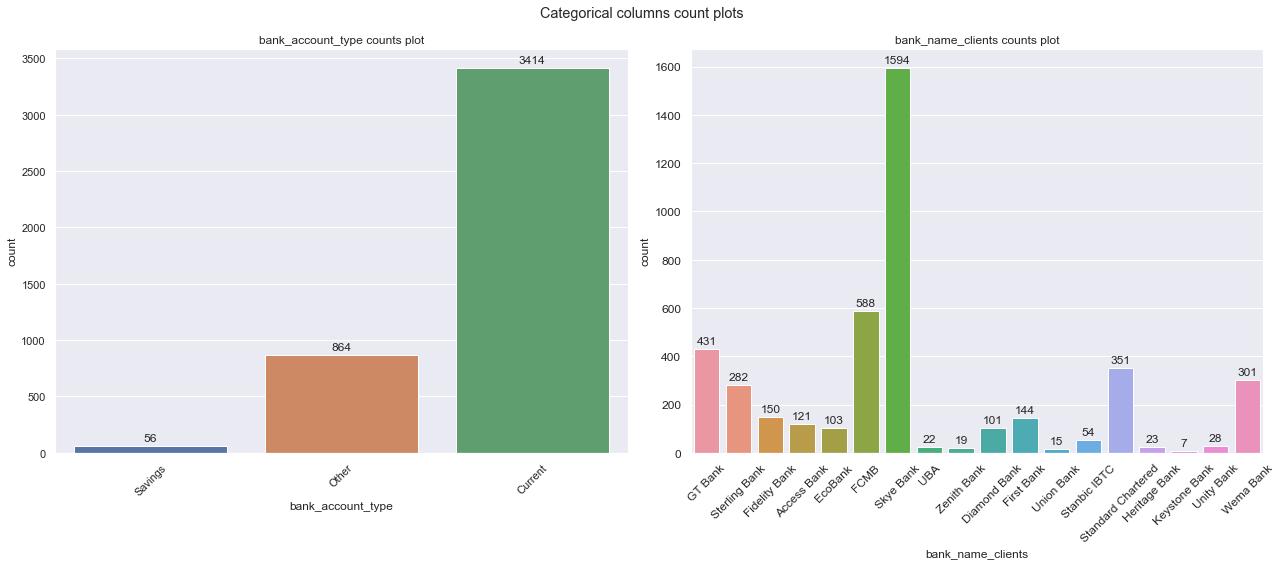

In [242]:
plots = Plots(data=train_dg, cat_cols=["bank_account_type", "bank_name_clients"])
plots.plot_all_cats(nrows=1, ncols=2, figsize=(18,8))

* bank_account_type: As we can see, the category savings is very rare, and we have the majority which is current, as reasonnable way to handle that, we will combine savings and other type of account together, thus we will end up with 2 categoriea in that column
* bank_name_clients: We will reduce the category using the categorical embedding methods and define the proper number of category

Let's analyse the continous value

In [243]:
train_dg.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,employment_status_clients_is_missing
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,0
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,Permanent,0
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,0
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,Permanent,0
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,Permanent,0


As continuous value we have longitude_gps and latitude_gps

C:\workspace\Projects\MLProjects\ZindiLoanPredChallenge\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude_gps', ylabel='latitude_gps'>

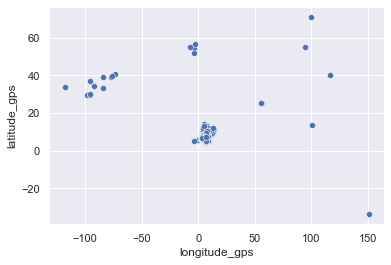

In [247]:
sns.scatterplot(train_dg.longitude_gps, train_dg.latitude_gps)

C:\workspace\Projects\MLProjects\ZindiLoanPredChallenge\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude_gps'>

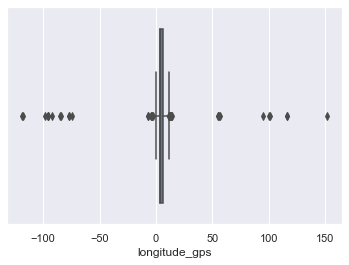

In [250]:
sns.boxplot(train_dg.longitude_gps)

We can observe that there is a isolate point. Lets analysis it

In [248]:
train_dg[train_dg.latitude_gps < 0 ]

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,employment_status_clients_is_missing
4032,8a858e7c588604a40158a75735995afa,1985-02-21 00:00:00.000000,Savings,151.20929,-33.868818,GT Bank,Permanent,0


We will find more information about this customer when combined with others sources of data